<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/FeatureEngineering/15_BalancingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
set1no = 900
set2no = 100

In [ ]:
df1=pd.DataFrame({
      # loc = ortalama , scale = standart sapma,
      "feature_1" : np.random.normal(loc=0,scale=1,size=set1no),
      "feature_2" : np.random.normal(loc=0,scale=1,size=set1no),
      "target" : [0] *set1no
})

df2=pd.DataFrame({
      # loc = ortalama , scale = standart sapma,
      "feature_1" : np.random.normal(loc=0,scale=1,size=set2no),
      "feature_2" : np.random.normal(loc=0,scale=1,size=set2no),
      "target" : [1] *set2no
})

In [ ]:
df1.head()

,feature_1,feature_2,target
0,1.154944,1.208197,0
1,-0.947210,-0.999449,0
2,0.810761,0.308709,0
3,0.840374,1.855040,0
4,-0.821138,-0.076464,0


In [ ]:
df2.head()

,feature_1,feature_2,target
0,-2.592193,1.812164,1
1,-0.709161,0.975848,1
2,-1.394113,-3.485074,1
3,-0.531598,-0.936399,1
4,0.676662,0.700792,1


In [ ]:
df = pd.concat([df1,df2]).reset_index(drop=True)

In [ ]:
df

,feature_1,feature_2,target
0,1.154944,1.208197,0
1,-0.947210,-0.999449,0
2,0.810761,0.308709,0
3,0.840374,1.855040,0
4,-0.821138,-0.076464,0
...,...,...,...
995,-0.957062,0.844885,1
996,0.113317,-0.204199,1
997,1.610808,-0.332693,1
998,0.482539,-0.194179,1


In [ ]:
df["target"].unique()

array([0, 1])

In [ ]:
df["target"].value_counts()

,count
target,
0,900
1,100


In [ ]:
# upsampling => upsample minority

In [ ]:
# downsampling => downsample majority   eğerki data sayımız azsa bunu yapmak pek mantıklı değil çünkü zaten az olan datayı dahada azaltmış oluruz bu şekilde

In [ ]:
# upsampling

In [ ]:
df_minority = df[df["target"]==1]

In [ ]:
df_minority

,feature_1,feature_2,target
900,-2.592193,1.812164,1
901,-0.709161,0.975848,1
902,-1.394113,-3.485074,1
903,-0.531598,-0.936399,1
904,0.676662,0.700792,1
...,...,...,...
995,-0.957062,0.844885,1
996,0.113317,-0.204199,1
997,1.610808,-0.332693,1
998,0.482539,-0.194179,1


In [ ]:
df_majority = df[df["target"]==0]

In [ ]:
df_majority

,feature_1,feature_2,target
0,1.154944,1.208197,0
1,-0.947210,-0.999449,0
2,0.810761,0.308709,0
3,0.840374,1.855040,0
4,-0.821138,-0.076464,0
...,...,...,...
895,-0.159076,0.272842,0
896,-0.136946,1.562912,0
897,1.544397,0.385204,0
898,1.869797,0.047313,0


In [ ]:
# upsample için sklearn kütüphanesi resample => sample boyutunu arttır ya da azalt

In [ ]:
from sklearn.utils import resample

In [ ]:
df_minority_upsampled = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [ ]:
df_minority_upsampled.shape

(900, 3)

In [ ]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [ ]:
df_upsampled

,feature_1,feature_2,target
0,1.154944,1.208197,0
1,-0.947210,-0.999449,0
2,0.810761,0.308709,0
3,0.840374,1.855040,0
4,-0.821138,-0.076464,0
...,...,...,...
952,0.384636,1.425359,1
965,-1.003272,-0.964438,1
976,1.762322,0.217457,1
942,0.714636,-0.574441,1


In [ ]:
df_upsampled["target"].value_counts()

,count
target,
0,900
1,900


In [ ]:
df_majority_downsampled = resample(df_majority,replace=True,n_samples=len(df_minority),random_state=42)

In [ ]:
df_majority_downsampled["target"].value_counts()

,count
target,
0,100


In [ ]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

In [ ]:
df_downsampled["target"].value_counts()

,count
target,
0,100
1,100


In [ ]:
# SMOTE (Synthetic Minority Over-Sampling Technique)

In [ ]:
df

,feature_1,feature_2,target
0,1.154944,1.208197,0
1,-0.947210,-0.999449,0
2,0.810761,0.308709,0
3,0.840374,1.855040,0
4,-0.821138,-0.076464,0
...,...,...,...
995,-0.957062,0.844885,1
996,0.113317,-0.204199,1
997,1.610808,-0.332693,1
998,0.482539,-0.194179,1


In [ ]:
import matplotlib.pyplot as plt

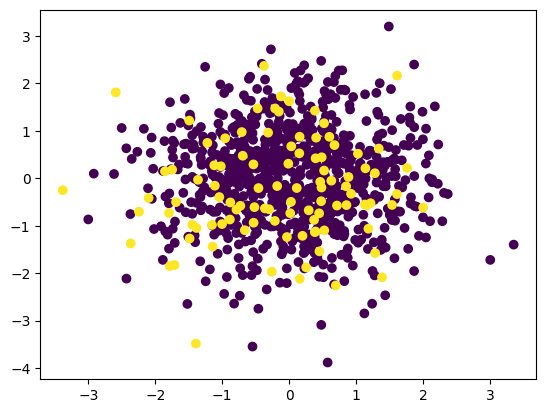

In [ ]:
plt.scatter(df["feature_1"],df["feature_2"] , c=df["target"])

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()

In [ ]:
(X,y) = oversample.fit_resample(df[["feature_1","feature_2"]],df["target"])

In [ ]:
X

,feature_1,feature_2
0,1.154944,1.208197
1,-0.947210,-0.999449
2,0.810761,0.308709
3,0.840374,1.855040
4,-0.821138,-0.076464
...,...,...
1795,1.138843,0.339104
1796,0.478364,-0.167139
1797,0.963631,-0.553015
1798,0.578702,0.604101


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1795,1
1796,1
1797,1
1798,1


In [ ]:
oversample_df = pd.concat([X,y],axis=1)

In [ ]:
oversample_df["target"].value_counts()

,count
target,
0,900
1,900


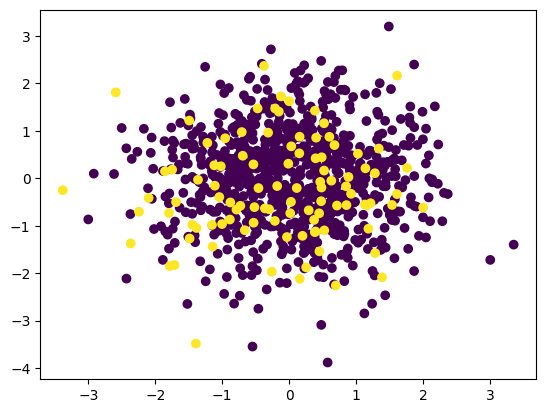

In [ ]:
plt.scatter(df["feature_1"],df["feature_2"] , c=df["target"])

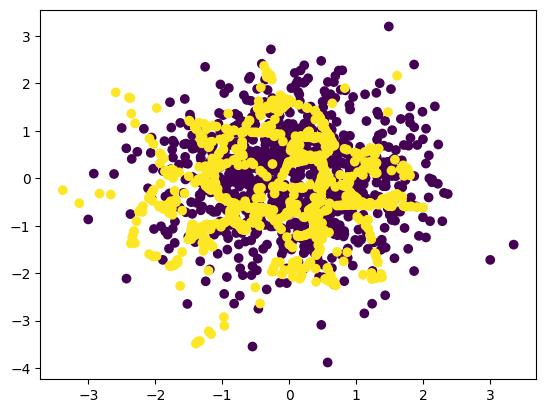

In [ ]:
plt.scatter(oversample_df["feature_1"],oversample_df["feature_2"] , c=oversample_df["target"])